In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def concentric(pos, angles, radius):
    x = np.cos(angles) * radius + pos[0]
    y = np.sin(angles) * radius + pos[1]
    return [x, y]

def concentric_flipped(pos, angles, radius):
    positions = concentric(pos, angles, radius)
    mid = int(np.floor(len(angles)/2))
    for i in range(1, mid+1):
        positions[0][mid - i] = positions[0][-i]
        positions[1][mid - i] = positions[1][-i]
        positions[0][-i] = 1.0 - positions[0][-i]
        
    return positions


In [3]:
def angles_intersect(radius, cx, cy, x, y):
    return angle1, angle2

def circle_intersection_angle_min(radius, cx, cy, x=0, y=1):
    dy = y-cy
    dx = x-cx
    #case 1
    dx_sq = radius**2 - dy**2
    angle1 = math.atan(dy/math.sqrt(dx_sq)) if dx_sq > 0 else math.pi
    #case 2
    dy_sq = radius**2 - dx**2
    angle2 = math.atan(math.sqrt(dy_sq)/dx) if dy_sq > 0 else math.pi
    
    return min(angle1, angle2)

def circle_intersection_angle_max(radius, cx, cy, x=0, y=1):
    dy = y-cy
    dx = x-cx
    #case 1
    dx_sq = radius**2 - dy**2
    angle1 = math.atan(dy/math.sqrt(dx_sq)) if dx_sq > 0 else -math.pi
    #case 2
    dy_sq = radius**2 - dx**2
    angle2 = math.atan(math.sqrt(dy_sq)/dx) if dy_sq > 0 else -math.pi
    
    return max(angle1, angle2)



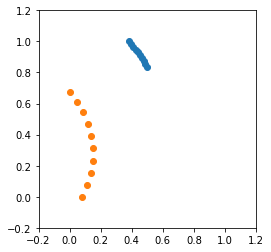

In [4]:
r1 = 1.1
r2 = 0.6
pos = np.array([-0.45, 0.28])

a1 = circle_intersection_angle_min(r1, pos[0], pos[1], 0, 1)
a2 = circle_intersection_angle_min(r2, pos[0], pos[1], 0, 1)

a3 = circle_intersection_angle_max(r1, pos[0], pos[1], 0.5, 0)
a4 = circle_intersection_angle_max(r2, pos[0], pos[1], 0.5, 0)

angles1 = np.linspace(a1, a3, 10)
angles2 = np.linspace(a2, a4, 10)

positions1 = concentric(pos, angles1, r1)
positions2 = concentric(pos, angles2, r2)

plt.gca().set_aspect('equal')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.plot(positions1[0], positions1[1], "o")
plt.plot(positions2[0], positions2[1], "o")

44


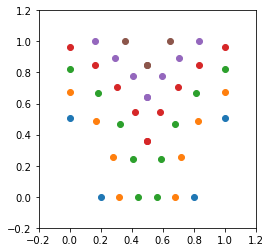

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

def concentric(pos, angles, radius):
    x = np.cos(angles) * radius + pos[0]
    y = np.sin(angles) * radius + pos[1]
    return [x, y]

def circle_intersection_angle_min(radius, cx, cy, x=0, y=1):
    dy = y-cy
    dx = x-cx
    #case 1
    dx_sq = radius**2 - dy**2
    angle1 = math.atan(dy/math.sqrt(dx_sq)) if dx_sq > 0 else math.pi
    #case 2
    dy_sq = radius**2 - dx**2
    angle2 = math.atan(math.sqrt(dy_sq)/dx) if dy_sq > 0 else math.pi
    
    return min(angle1, angle2)

def circle_intersection_angle_max(radius, cx, cy, x=0, y=1):
    dy = y-cy
    dx = x-cx
    #case 1
    dx_sq = radius**2 - dy**2
    angle1 = math.atan(dy/math.sqrt(dx_sq)) if dx_sq > 0 else -math.pi
    #case 2
    dy_sq = radius**2 - dx**2
    angle2 = math.atan(math.sqrt(dy_sq)/dx) if dy_sq > 0 else -math.pi
    
    return max(angle1, angle2)

# x1, y1 is top left corner
def plot(radii, numbers, pos, reflection_x=False, x1=0, y1=1, x2=1, y2=0):
    if reflection_x:
        x2 = (x1 + x2)*0.5

    count = 0
    for r, n in zip(radii, numbers):
        a1 = circle_intersection_angle_min(r, pos[0], pos[1], x1, y1)
        a2 = circle_intersection_angle_max(r, pos[0], pos[1], x2, y2)
        angles = np.linspace(a1, a2, n)
        x, y = concentric(pos, angles, r)
        count += len(x)
        
        if reflection_x:
            x_flipped = x2*2 - x
            count += len(x)
            x = np.concatenate([x, x_flipped], axis=0)
            y = np.concatenate([y, y], axis=0)

        plt.gca().set_aspect('equal')
        plt.xlim(-0.2, 1.2)
        plt.ylim(-0.2, 1.2)
        
        plt.plot(x, y, "o")
        
    print(count)
r = [0.75, 0.87, 0.99, 1.11, 1.23, 1.35]
n = [2, 4, 5, 5, 4, 2]

pos = np.array([-0.55, 0.0])
plot(r, n, pos, True)

38


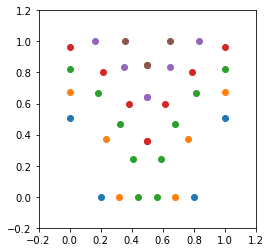

In [6]:
r = [0.75, 0.87, 0.99, 1.11, 1.23, 1.35]
n = [2, 3, 5, 4, 3, 2]

pos = np.array([-0.55, 0.0])
plot(r, n, pos, True)

36


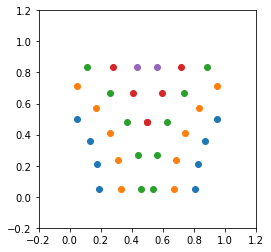

In [7]:
r = [0.76, 0.90, 1.031, 1.15, 1.268]
n = [4, 5, 5, 3, 1]

h = 15.0/17

pos = np.array([-0.57, 0.06])
plot(r, n, pos, True, 0.05, h - 0.05, 0.95, 0.05)